## Greedy algorithm for interval scheduling
## Problem Description:
### Given a set of activities (or tasks) with start and finish times, select the maximum number of activities that don't overlap with each other. The objective is to find the maximum number of non-overlapping activities.


### Generate an instance

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations

In [13]:
def generate_intervals(number_of_intervals=20,min_start=0,max_start=50,max_length=20):
    ans=[]
    for i in range(number_of_intervals):
        line=dict()
        line["index"]=i
        line["start"]=np.random.choice(range(min_start,max_start))
        line["end"]=line["start"]+np.random.choice(range(1,max_length))
        ans.append(line)
    return ans

## Check collision

In [14]:
def check_collision(x,y):
    ans=True
    if x["start"]>=y["end"] or y["start"]>=x["end"]:
        ans= False
    return ans

## Choose interval that finishes first

In [15]:
def choose_interval(intervals):
    finish_time=min([interval["end"] for interval in intervals])
    for interval in intervals:
        if interval["end"]==finish_time:
            return interval



## Interval scheduling algorithm

In [16]:
def interval_scheduling(intervals):
    requests=intervals
    accepted=[]
    while requests:
        chosen=choose_interval(requests)
        accepted.append(chosen)
        requests=[request for request in requests if check_collision(chosen,request)==False]
        #print(requests)
        #print(chosen)
    return accepted

## Plot an instance of the problem

In [18]:

def plot_instance(instance):
    # Create a new figure and axis object
    fig, ax = plt.subplots()

    # Define y-values and corresponding x start and end values for the horizontal lines
    lines_data = instance
    

    # Plot each horizontal line
    for line in lines_data:
        l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]], color='blue')
        l.set_linewidth(3)

    # Adjust the x and y axis limits if necessary
    #ax.set_xlim(0, 10)  # This sets x-axis limits from 0 to 10
    #ax.set_ylim(0, 6)   # This sets y-axis limits from 0 to 6

    # Display the plot
    return plt.show()


In [19]:
instance=generate_intervals(50,1,100,20)
solution=interval_scheduling(instance)

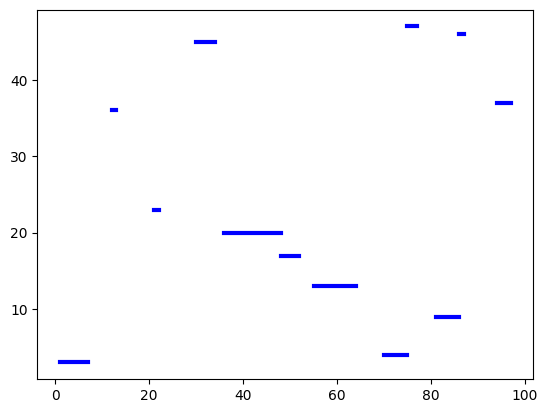

In [20]:
plot_instance(solution)

## Animating the algorithm

### Create a function which keeps the lists of selected and rejected requests

In [21]:
def interval_scheduling_frames(intervals):
    frames=[]
    frame=dict()
    frame["selected"]=[]
    frame["rejected"]=[]
    frames.append(frame)
    requests=intervals

    while requests:
        chosen=choose_interval(requests)
        newframe=dict()
        newframe["selected"]=frames[-1]["selected"]+[chosen]
        newframe["rejected"]=frames[-1]["rejected"]+[request for request in requests if (check_collision(chosen,request)==True and request!=chosen)]
        frames.append(newframe)
        requests=[request for request in requests if check_collision(chosen,request)==False]
        #print(requests)
        #print(chosen)
    return frames

In [23]:
def animate(instance):
    # Set up the figure, the axis, and the plot element
    requests=instance
    fig, ax = plt.subplots()
    lines_data = instance
    N=len(instance)
        
    horlines=[]
    # Plot each horizontal line
    for line in lines_data:
            horline,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]], color='blue')
            horline.set_linewidth(3)
            horlines.append(horline)
    for horline in horlines:
        horline.set_color("blue")
    frames=interval_scheduling_frames(instance)

    def init():
        #ax.set_xlim(0, 10)
        #ax.set_ylim(0, len(instance))
        return *horlines,

    def update(cuadro):
        for line in cuadro["selected"]:
            horlines[line["index"]].set_color("limegreen")
        for line in cuadro["rejected"]:
            horlines[line["index"]].set_color("red")

        return horlines

    ani = FuncAnimation(fig, update, frames=frames,init_func=init,blit=True)
    return HTML(ani.to_jshtml())
#plt.show()






## Example

In [24]:
def make_example(number_of_requests,min_start,max_start,max_lenght):
    ans=dict()
    ans["requests"]=generate_intervals(number_of_requests,min_start,max_start,max_lenght)
    ans["solution"]=interval_scheduling(ans["requests"])
    ans["plot_requests"]=plot_instance(ans["requests"])
    ans["plot_solution"]=plot_instance(ans["solution"])
    ans["animation"]=animate(ans["requests"])
    return ans

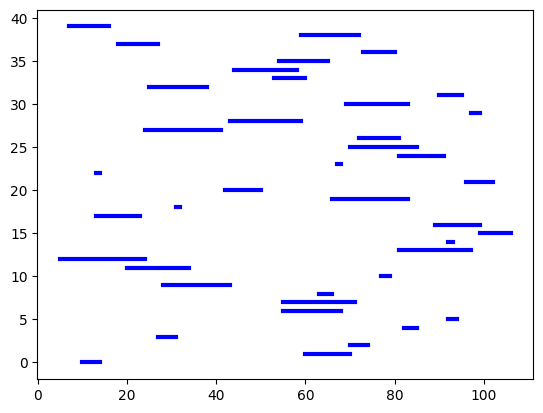

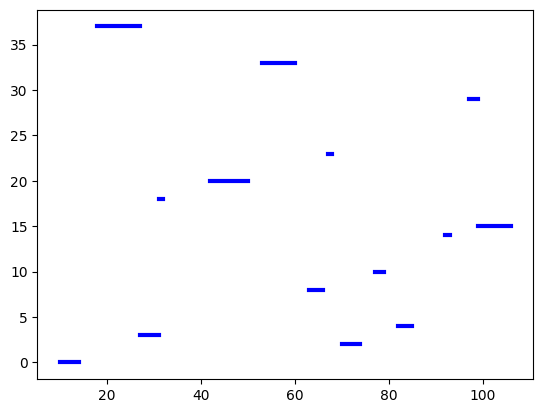

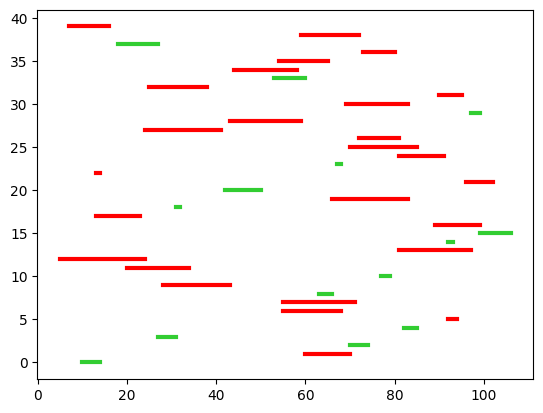

In [25]:
example=make_example(40,1,100,20)

In [26]:
example["animation"]